# Utsläpp: Extrauppgift

In [13]:
import pandas as pd

## Läs in csv-filen och gör en liten undersökning dess innehåll

In [14]:
emission_df = pd.read_csv("emission_data.csv")
emission_df.head()

,Country,Area,Year,Population,Emission
0,Afghanistan,652864.0,1990,12412311.0,2.546
1,Afghanistan,652864.0,2005,25654274.0,1.063
2,Afghanistan,652864.0,2017,36296111.0,11.422
3,Albania,28748.0,1990,3286070.0,6.583
4,Albania,28748.0,2005,3086810.0,4.196


In [15]:
filter = emission_df["Country"].isin(["Sweden", "Greenland"])
selected_df = emission_df[filter]
selected_df

,Country,Area,Year,Population,Emission
231,Greenland,0.0,1990,NaN,0.003
232,Greenland,0.0,2005,NaN,0.631
233,Greenland,0.0,2017,NaN,0.518
540,Sweden,450295.0,1990,8567375.0,58.117
541,Sweden,450295.0,2005,9038627.0,55.877
542,Sweden,450295.0,2017,9904895.0,50.874


In [16]:
emission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     627 non-null    object 
 1   Area        627 non-null    float64
 2   Year        627 non-null    int64  
 3   Population  585 non-null    float64
 4   Emission    627 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 24.6+ KB


## I följande menyval, om ett land saknar någon av datan som behövs för utskriften, hoppa över det landet. Låtsas som att det inte finns.

In [17]:

# Behövs ej. Vi tar hand om problemet senare...
# df = emission_df.dropna()
df = emission_df

In [18]:
df.describe()

,Area,Year,Population,Emission
count,6.270000e+02,627.00000,5.850000e+02,627.000000
mean,6.514630e+05,2004.00000,3.523108e+07,158.152013
std,1.869229e+06,11.05418,1.311708e+08,717.772804
min,0.000000e+00,1990.00000,6.215200e+04,0.001000
25%,1.500700e+04,1990.00000,1.799077e+06,0.975000
50%,1.088890e+05,2005.00000,6.867058e+06,7.806000
75%,4.754420e+05,2017.00000,2.112803e+07,58.097000
max,1.707520e+07,2017.00000,1.421022e+09,10877.218000


## Menyval e1: 
Skriv ut hur mycket CO2 varje land släpper ut för ett av åren i storleks ordning, mest utsläpp först, avrunda till 2 decimaler. Be Användaren om input där användaren skriver in vilket år som ska användas, t.ex. "1990" . Det ska även gå att skriva in hur många länder som ska visas, t.ex. "1990 10", då ska bara de 10 högsta länderna skrivas ut. Utskriften ska ha formatet <land>: <utsläpp> med ett land per rad.

In [19]:
year = 2017
number_of_rows_to_show = 10

selected_df = df[df["Year"] == year]
selected_df.sort_values('Emission', ascending=False).head(number_of_rows_to_show)

,Country,Area,Year,Population,Emission
116,China,9596961.0,2017,1.421022e+09,10877.218
596,United States of America,9833520.0,2017,3.250848e+08,5107.393
188,European Union,4233262.0,2017,4.461313e+08,3548.345
269,India,3287263.0,2017,1.338677e+09,2454.774
461,Russia,17075200.0,2017,1.455301e+08,1764.866
296,Japan,377972.0,2017,1.275027e+08,1320.776
221,Germany,357168.0,2017,8.265841e+07,796.529
524,South Korea,100210.0,2017,5.109641e+07,673.324
275,Iran,1648195.0,2017,8.067389e+07,671.450
491,Saudi Arabia,2149690.0,2017,3.310118e+07,638.762


## Menyval e2:
Användaren ska skriva in ett år och få utskriften varje lands utsläpp per capita, sortera i storleksordning, avrunda till 2 decimaler. Det ska även gå att skriva in hur många länder som ska skriva ut. Om användaren enbart skriver in ett år ska alla länder skrivas ut.

In [20]:
year = 2017

# Ett visa alla rader hack mha None...
# number_of_rows_to_show = None
pd.set_option('display.max_rows', 1000)

number_of_rows_to_show = 10

selected_df = df[df["Year"] == year].copy() # copy needed...
selected_df["Emission_per_capita"] = selected_df["Emission"] / selected_df["Population"]

selected_df.sort_values('Emission_per_capita', ascending=False).head(number_of_rows_to_show)

,Country,Area,Year,Population,Emission,Emission_per_capita
140,Curaçao,444.0,2017,161986.0,7.519,0.000046
455,Qatar,11581.0,2017,2724727.0,97.787,0.000036
569,Trinidad and Tobago,5131.0,2017,1384060.0,37.745,0.000027
311,Kuwait,17818.0,2017,4056102.0,97.151,0.000024
41,Bahrain,765.3,2017,1494077.0,35.775,0.000024
590,United Arab Emirates,83600.0,2017,9487206.0,202.802,0.000021
401,New Caledonia,18576.0,2017,277159.0,5.912,0.000021
491,Saudi Arabia,2149690.0,2017,33101183.0,638.762,0.000019
422,Oman,309500.0,2017,4665926.0,78.421,0.000017
98,Canada,9984670.0,2017,36732091.0,617.301,0.000017


## Menyval e3:
Användaren ska skriva in ett år och få utskriften varje lands utsläpp per landyta, sortera i storleksordning, avrunda till 2 decimaler. Det ska även gå att skriva in hur många länder som ska skriva ut. Om användaren enbart skriver in ett år ska alla länder skrivas ut.

In [21]:
year = 2017
number_of_rows_to_show = 10

selected_df = df[df["Year"] == year].copy()
selected_df = selected_df[selected_df["Area"] > 0] # Avoid: / 0
selected_df["Emission_per_area"] = selected_df["Emission"] / selected_df["Area"]

plot_df = selected_df.sort_values('Emission_per_area', ascending=False)
plot_df.head(number_of_rows_to_show)

,Country,Area,Year,Population,Emission,Emission_per_area
506,Singapore,721.5,2017,5708042.0,55.018,0.076255
41,Bahrain,765.3,2017,1494077.0,35.775,0.046746
527,South Sudan,619.0,2017,10910774.0,21.056,0.034016
140,Curaçao,444.0,2017,161986.0,7.519,0.016935
260,Hong Kong,2755.0,2017,7306315.0,44.715,0.016230
341,Macao,115.3,2017,622578.0,1.280,0.011101
455,Qatar,11581.0,2017,2724727.0,97.787,0.008444
551,Taiwan,36197.0,2017,23674546.0,279.740,0.007728
569,Trinidad and Tobago,5131.0,2017,1384060.0,37.745,0.007356
47,Barbados,439.0,2017,286229.0,3.172,0.007226


## Extra: Extra

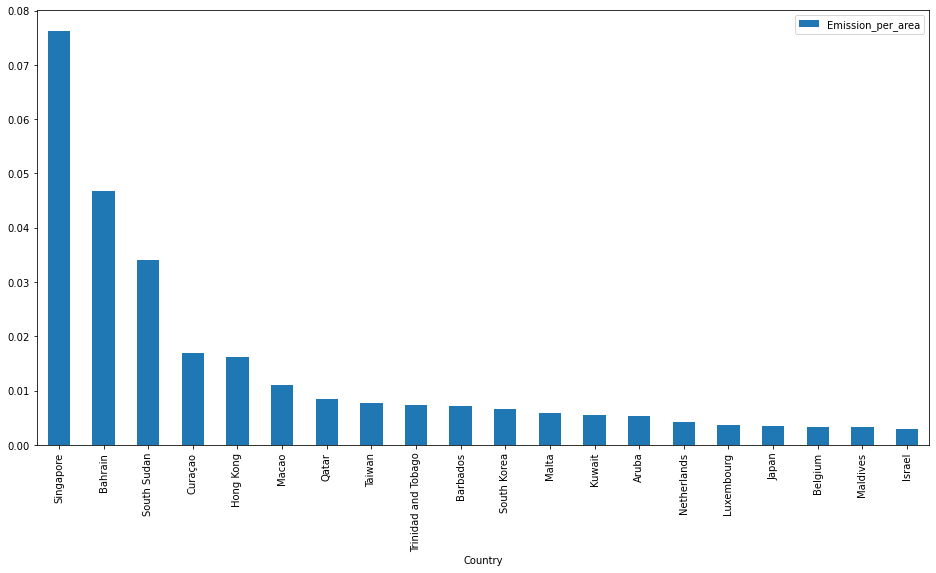

In [22]:
number_of_rows_to_show = 20
plot_df.head(number_of_rows_to_show).plot.bar(x="Country", y= "Emission_per_area", figsize=(16, 8));

In [23]:
# The End